# Signals and Systems
# Lab 1: convolution and correlation

## Preparation

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve,convolve2d,correlate
import pandas as pd

## Part 2: Convolution and correlation of 2D signals

### Detecting edges in an image

In this example, we will work with another simple filter which performs a simple estimation of the derivative: $y[n]=x[n+1]-x[n-1]$. This operation is useful to detect changes, and, since the transformation is linear and invariant, can be computed as a convolution between the signal and a filter with a certain impulse response $h[n]$.

#### 1.   Which is the impulse response, $h[n]$, of the filter to obtain $y[n]$ as the convolution between $x[n]$ and $h[n]$?

The impulse response of this system is $h[n]=\delta[n+1]-\delta[n-1]$. This can be shown as \begin{equation}
x[n]*h[n]=x[n]*(\delta[n+1]-\delta[n-1])=x[n]*\delta[n+1]-x[n]*\delta[n-1]=x[n+1]-x[n-1]=y[n].
\end{equation}

We are going to apply previous filter to a 2D signal of size $N\times N$. We will first generate the signal. Being this one a 2D signal, we will visualize it as an image with `plt.imshow`.

In [0]:
N = 128
# We create the artificial 2D signals X1 and X2
X1 = np.zeros((N,N))
X2 = np.zeros((N,N))
X1[:, int(0.5*N):] = 1
X2[:int(0.5*N), 0:int(0.5*N)] = 1
X2[int(0.5*N):, int(0.5*N):] = 1

We plot the signals as images:

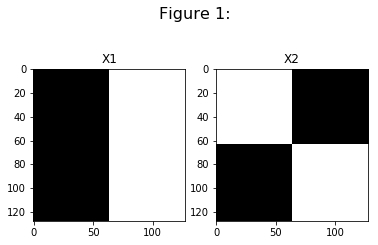

In [3]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(X1, cmap='gray')
axarr[0].set_title('X1')
axarr[1].imshow(X2, cmap='gray')
axarr[1].set_title('X2')
f.suptitle('Figure 1:', fontsize=16)
f.show()

Write a code to compute the convolution of each row of matrix $X1$ with $h[n]$. The result will be
a new matrix $Y1$ where each row is the result of the convolution of $h[n]$ and the corresponding
row in $X1$. Store the result of each convolution in the row of a new matrix $Y1$. Visualize the result with `plt.imshow(Y1)`. Do the same with $X2$.

We first of all create the function to convolve in 2D as explained before.

In [0]:
def myconvolve2D(X, h):
  Y = []
  for seq in X:
    Y.append(convolve(seq, h, mode='same'))
  return Y

And we set up the impulse response $h[n]=[-1,0,1]$

In [0]:
h = np.array([-1,0,1])

#### 2.   What do you observe when you visualize $Y1$?

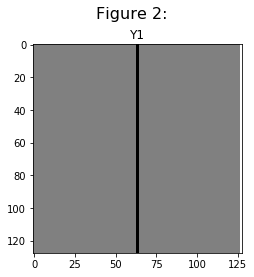

In [6]:
Y1 = myconvolve2D(X1,h)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(Y1, cmap='gray')
plt.title('Y1')
fig.suptitle('Figure 2:', fontsize=16)
fig.show()

We can see the border between the black and white regions of the image in $X1$ clearly marked by the black line in the convolution.

#### 3.    What do you observe when you visualize $Y2$?

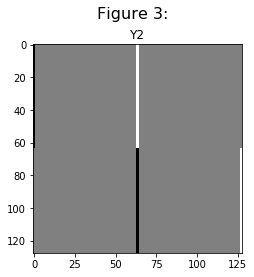

In [7]:
Y2 = myconvolve2D(X2,h)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(Y2, cmap='gray')
plt.title('Y2')
fig.suptitle('Figure 3:', fontsize=16)
fig.show()

This time we can see the borders between regions only horizontally, but not vertically, as we are only checking for horizontal changes.

#### 4.   Explain how you would estimate all the edges of the image. Test your procedure with the previous artificial images and also with a real gray-level image.

This could be done by using a filter that estimates the derivative in both directions; that would be, a filter $H[n]$ like this:
\begin{equation}H[n]=
\left[\begin{matrix}
0 & -1 & 0\\
-1 & 0 & 1\\
0 & 1 & 0
\end{matrix}\right].
\end{equation}
This should effectively detect all big changes of intensity in an image and thus, detect edges.

In [0]:
# Creation of the impulse response H
H = np.zeros((3,3)); H[0,1]=H[1,0]=-1; H[1,2]=H[2,1]=1

In this way we can see borders both in the horizontal and vertical directions, as is clearly seen in the images below result of the convolutions.

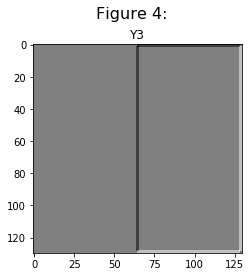

In [9]:
Y3 = convolve2d(H,X1)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(Y3, cmap='gray')
plt.title('Y3')
fig.suptitle('Figure 4:', fontsize=16)
fig.show()

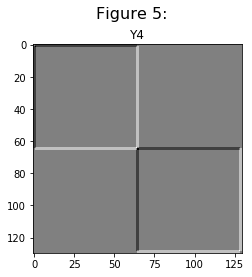

In [10]:
Y4 = convolve2d(H,X2)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(Y4, cmap='gray')
plt.title('Y4')
fig.suptitle('Figure 5:', fontsize=16)
fig.show()

Now a test with a true image (the known 1972 picture of Lena Söderberg):

In [0]:
# We load the image reading module from imageio and our own repository with the
# image files.
from imageio import imread
!git clone --recursive https://github.com/Atellas23/sis_files

The original image is:

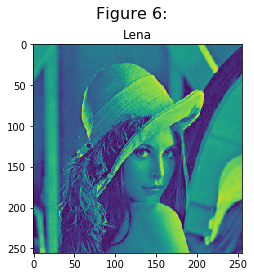

In [12]:
img = imread('/content/sis_files/Lena.jpg')
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(img)
plt.title('Lena')
fig.suptitle('Figure 6:', fontsize=16)
fig.show()

And now we apply our 2D filter to the image:

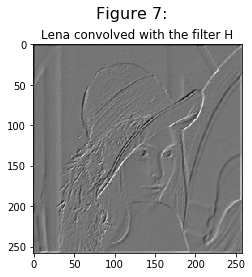

In [13]:
im = np.asarray(img)
Y5 = convolve2d(H,im)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(Y5, cmap='gray')
plt.title('Lena convolved with the filter H')
fig.suptitle('Figure 7:', fontsize=16)
fig.show()

We can also try with the following impulse response $G[n]$,
\begin{equation}G[n]=
\left[\begin{matrix}
-1 & -1 & 1\\
-1 & 0 & 1\\
-1 & 1 & 1
\end{matrix}\right],
\end{equation}
which should also take into account changes in the diagonal directions.

In [0]:
G = H
G[0,0]=G[2,0]=-1; G[2,2]=G[0,2]=1;

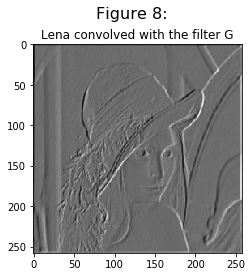

In [15]:
Y6 = convolve2d(G,im)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(Y6, cmap='gray')
plt.title('Lena convolved with the filter G')
fig.suptitle('Figure 8:', fontsize=16)
fig.show()

We have tried two different filters with similar results.

### Pattern matching in images

We have seen previously that correlation can be used to automatically locate particular patterns within a 1D signal $x[n]$. The same approach can be extended to find patterns in images by generalizing the convolution operator to two dimensions:
\begin{equation}
y[m,n]=x[m,n]*f[m,n]=\sum_{k=-\infty}^{+\infty}\sum_{l=-\infty}^{+\infty}x[k,l]f[m-k,n-l]
\end{equation}

The files called `find_sis1.png`, `find_sis2.png`, and `find_sis3.png` of size $1024\times1024$ pixels contain a random pattern of white pixels (coded as 1) and black pixels (0) shown in figure 1a as well as a single instance of the image of figure 1b.

#### 5.    Write a code to find automatically the SIS pattern in the images `find_sis1.png`, `find_sis2.png` and `find_sis3.png`. Explain your procedure and your results.

First of all, we create the SIS logo signal:

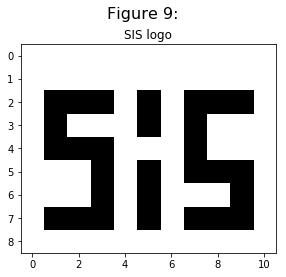

In [16]:
logo = [
    [1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,0,1,0,1,0,0,0,1],
    [1,0,1,1,1,0,1,0,1,1,1],
    [1,0,0,0,1,1,1,0,1,1,1],
    [1,1,1,0,1,0,1,0,0,0,1],
    [1,1,1,0,1,0,1,1,1,0,1],
    [1,0,0,0,1,0,1,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1,1]
]
logo = np.asarray(logo).reshape(9,11)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(logo, cmap='gray')
plt.title('SIS logo')
fig.suptitle('Figure 9:', fontsize=16)
fig.show()

Then, we load each of the images:

In [0]:
img1 = imread('/content/sis_files/find_sis1.png')
img3 = imread('/content/sis_files/find_sis3.png')
img2 = imread('/content/sis_files/find_sis2.png')

We define a pair of utility functions:
-    `findMax` to search for the maximum and return its position in the image:
-    `drawNB` to print the neighbourhood of the points found and check that it indeed contains the SIS logo

In [0]:
def findMax(arr):
  # print(np.amax(arr))
  # Find index of maximum value from 2D numpy array
  result = np.where(arr == np.amax(arr))
  aux = np.asarray(result)
  aux2 = [aux[0,0],aux[1,0]]
  # return the position
  return aux2

And now we search for the SIS logo in the images through correlation. This is analogous to the case in 1D, as we are looking for a pattern in a signal.

Position of maximum: 324 , 850


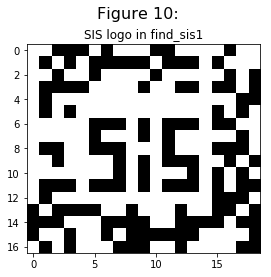

In [19]:
find_sis1 = correlate(img1,logo)
place = findMax(find_sis1)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(img1[place[0]-12:place[0]+5,place[1]-14:place[1]+5],cmap='gray')
plt.title('SIS logo in find_sis1')
fig.suptitle('Figure 10:', fontsize=16)
fig.show()
print('Position of maximum:',place[0],',',place[1])

Position of maximum: 769 , 437


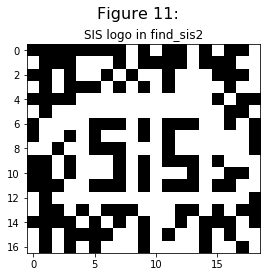

In [20]:
find_sis2 = correlate(img2,logo)
place = findMax(find_sis2)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(img2[place[0]-12:place[0]+5,place[1]-14:place[1]+5],cmap='gray')
plt.title('SIS logo in find_sis2')
fig.suptitle('Figure 11:', fontsize=16)
fig.show()

print('Position of maximum:',place[0],',',place[1])

Position of maximum: 54 , 68


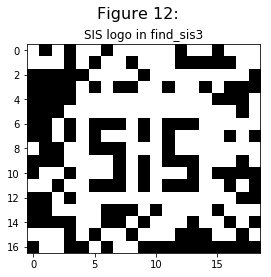

In [21]:
find_sis3 = correlate(img3,logo)
place = findMax(find_sis3)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
plt.imshow(img3[place[0]-12:place[0]+5,place[1]-14:place[1]+5],cmap='gray')
plt.title('SIS logo in find_sis3')
fig.suptitle('Figure 12:', fontsize=16)
fig.show()

print('Position of maximum:',place[0],',',place[1])

We have finally found the logo in all three images successfully.

- Aleix Torres i Camps (aleix.torres.camps@est.fib.upc.edu)
- Àlex Batlle Casellas (alex.batlle@est.fib.upc.edu)